In [3]:
chr(3583)

'\u0dff'

In [15]:
'fපරෑ'.replace('fප', 'ෆ')

'ෆරෑ'

In [22]:
filePath = r'D:\Final Year Project\Data\SiTa\Extracted\Combined\combinedUniqueNames.txt'
names = open(filePath, 'r', encoding='utf-8').readlines()
cleanedNames = []
for line in names:
    line = line.replace('fප', 'ෆ')
    line = line.replace('Fප', 'ෆ')
    for name in line.split('.'):
        cleanedName = ''
        for character in name:
            cleanedName += character if( 3456 < ord(character) < 3583 or character == '\u200d' ) else ''
        # print(cleanedName)
        if(len(cleanedName) > 2):
            cleanedNames.append(cleanedName)

In [23]:
len(cleanedNames)

59645

In [21]:
filePath = r'D:\Final Year Project\Data\SiTa\Extracted\Combined\combinedAllNames- Cleaned.txt'
open(filePath, 'w', encoding='utf-8').write('\n'.join(cleanedNames))

558341

In [1]:
from collections import defaultdict
from unicodedata import normalize as unicodeNormalize
import regex as re

In [2]:
suffixesList = [ 
    "්", 
    "ා", 
    "ැ", 
    "ෑ", 
    "ි", 
    "ී", 
    "ු", 
    "ූ", 
    "ෙ", 
    "ේ", 
    "ෛ", 
    "ො", 
    "ෝ" ,
    "ෞ",
    "ෘ",
    "ෲ"
    ]

In [3]:
def tokenize(text):
    tokens = []
    li = 1
    while li < len(text):
    # for li in range(1, len(text)):
        prevChar, currentChar = text[li - 1], text[li]
        if(currentChar == '\u200d'):
                if(li < len(text) - 1):
                    if(prevChar == suffixesList[0] and (text[li + 1] == 'ර' or text[li + 1] == 'ය' or text[li + 1] == 'ද')):
                        tokens.append(tokens.pop()+currentChar+text[li + 1])
                        li += 1
        elif(currentChar in suffixesList):
            if(li != 1):
                tokens.append(f"{tokens.pop()}{currentChar}")
            else:
                tokens.append(f"{prevChar}{currentChar}")
        else:
            if(li == 1):
                tokens.append(prevChar)
            tokens.append(currentChar)
        li += 1
    return tokens

In [4]:
list('සෞම්‍යා')

['ස', 'ෞ', 'ම', '්', '\u200d', 'ය', 'ා']

In [6]:
tokenize('ශේෂාද්‍රී')

['සෞ', 'ම්\u200dයා']

In [21]:
raw_data = open('newNames.txt', encoding='utf-8').read()
lines = open('newNames.txt', 'r', encoding='utf-8').readlines()
lines = [line.strip() for line in lines if len(line) > 1]

In [24]:
raw_data = open('SortedSinhalaNamesNew.txt', encoding='utf-8').read()
lines = []
with open('newNames.txt', 'r', encoding='utf-8') as f:
    allCharacters = []
    for line in f.readlines():
        line = re.sub(r'[^\w]|_|[a-zA-Z]|\u200c', ' ', line)
        line = unicodeNormalize("NFC", line.strip())
        for sub in line.split():
            sub = tokenize(sub)
            if(len(sub) > 1):
                lines.append(sub)
            allCharacters = list(set(allCharacters + sub))

In [25]:
with open('test.txt', 'w', encoding='utf-8') as f:
    f.write('\n'.join(sorted(allCharacters)))

In [26]:
sorted(allCharacters)

['ං',
 'අ',
 'ආ',
 'ඇ',
 'ඈ',
 'ඉ',
 'ඊ',
 'උ',
 'ඌ',
 'එ',
 'ඒ',
 'ඔ',
 'ඕ',
 'ඖ',
 'ක',
 'ක්',
 'ක්\u200dය',
 'ක්\u200dර',
 'ක්\u200dරා',
 'ක්\u200dරි',
 'ක්\u200dරේ',
 'කා',
 'කැ',
 'කෑ',
 'කි',
 'කී',
 'කු',
 'කූ',
 'කෙ',
 'කේ',
 'කෛ',
 'කො',
 'කෝ',
 'කෞ',
 'කෲ',
 'ඛ',
 'ඛ්\u200dයා',
 'ඛා',
 'ඛි',
 'ග',
 'ග්',
 'ග්\u200dය',
 'ග්\u200dයා',
 'ග්\u200dර',
 'ග්\u200dරා',
 'ග්\u200dරී',
 'ග්\u200dරේ',
 'ගා',
 'ගි',
 'ගී',
 'ගු',
 'ගෙ',
 'ගේ',
 'ගො',
 'ගෝ',
 'ගෞ',
 'ඝ',
 'ඝා',
 'ඟ',
 'ඟි',
 'ඟු',
 'ච',
 'ච්',
 'චා',
 'චි',
 'චු',
 'චෙ',
 'චේ',
 'ජ',
 'ජ්',
 'ජා',
 'ජි',
 'ජී',
 'ජු',
 'ජූ',
 'ජෙ',
 'ජේ',
 'ජො',
 'ජෝ',
 'ඤ',
 'ඤ්',
 'ඤා',
 'ඤෝ',
 'ඥ',
 'ඥා',
 'ට',
 'ට්',
 'ට්\u200dර',
 'ට්\u200dරා',
 'ට්\u200dරි',
 'ට්\u200dරෝ',
 'ටා',
 'ටැ',
 'ටි',
 'ටී',
 'ටු',
 'ටෙ',
 'ටේ',
 'ටෝ',
 'ඩ',
 'ඩ්',
 'ඩා',
 'ඩැ',
 'ඩි',
 'ඩී',
 'ඩු',
 'ඩෙ',
 'ඩේ',
 'ඩො',
 'ඩෝ',
 'ඩෲ',
 'ණ',
 'ණ්',
 'ණ්\u200dය',
 'ණ්\u200dයා',
 'ණා',
 'ණි',
 'ණී',
 'ණු',
 'ණේ',
 'ඬි',
 'ඬේ',
 'ත',
 'ත්',
 'ත්\u200dය',
 'ත්\u2

In [27]:
count = defaultdict(int)
for line in lines:
    for ch in line:
        count[ch] += 1

In [28]:
count = {k: v for k, v in sorted(count.items(), key=lambda item: item[1], reverse=True)}
count

{'අ': 8084,
 'න්': 5247,
 'ර': 4760,
 'ගේ': 3517,
 'ම': 3483,
 'ය': 2729,
 'ත්': 2367,
 'ල්': 2283,
 'හ': 2214,
 'ං': 2148,
 'න': 2119,
 'ලා': 1977,
 'ල': 1968,
 'ක': 1907,
 'දු': 1797,
 'දි': 1684,
 'ස': 1661,
 'මා': 1560,
 'සි': 1556,
 'ව': 1548,
 'මු': 1519,
 'ම්': 1483,
 'ත': 1443,
 'රි': 1396,
 'ද': 1389,
 'ග': 1357,
 'කා': 1322,
 'නි': 1286,
 'ර්': 1227,
 'සේ': 1179,
 'බ්': 1134,
 'නා': 1107,
 'ති': 1022,
 'කු': 873,
 'ලි': 868,
 'ස්': 860,
 'රු': 842,
 'ප': 815,
 'තු': 804,
 'බේ': 791,
 'වි': 709,
 'මි': 672,
 'රා': 659,
 'ආ': 653,
 'සු': 651,
 'ක්': 635,
 'ඩ්': 633,
 'චි': 618,
 'ජ': 593,
 'ෂා': 560,
 'ච්': 556,
 'කෝ': 504,
 'බ': 496,
 'ගෙ': 492,
 'සා': 489,
 'යා': 453,
 'පු': 452,
 'මො': 438,
 'තා': 426,
 'ප්': 424,
 'ණ': 422,
 'ච': 397,
 'නී': 388,
 'යි': 385,
 'ලු': 384,
 'නු': 377,
 'වා': 371,
 'ඉ': 353,
 'ඩ': 352,
 'ෆා': 327,
 'හා': 310,
 'හේ': 307,
 'ප්\u200dර': 284,
 'ද්': 283,
 'ගො': 283,
 'ධි': 274,
 'පා': 268,
 'ධ': 265,
 'ඩි': 262,
 'උ': 260,
 'දී': 253,
 'ෂ්': 248,


In [ ]:
count = {k: v for k, v in sorted(count.items())}
count

In [37]:
occurances = list(count.values())
characterNames = list(count.keys())

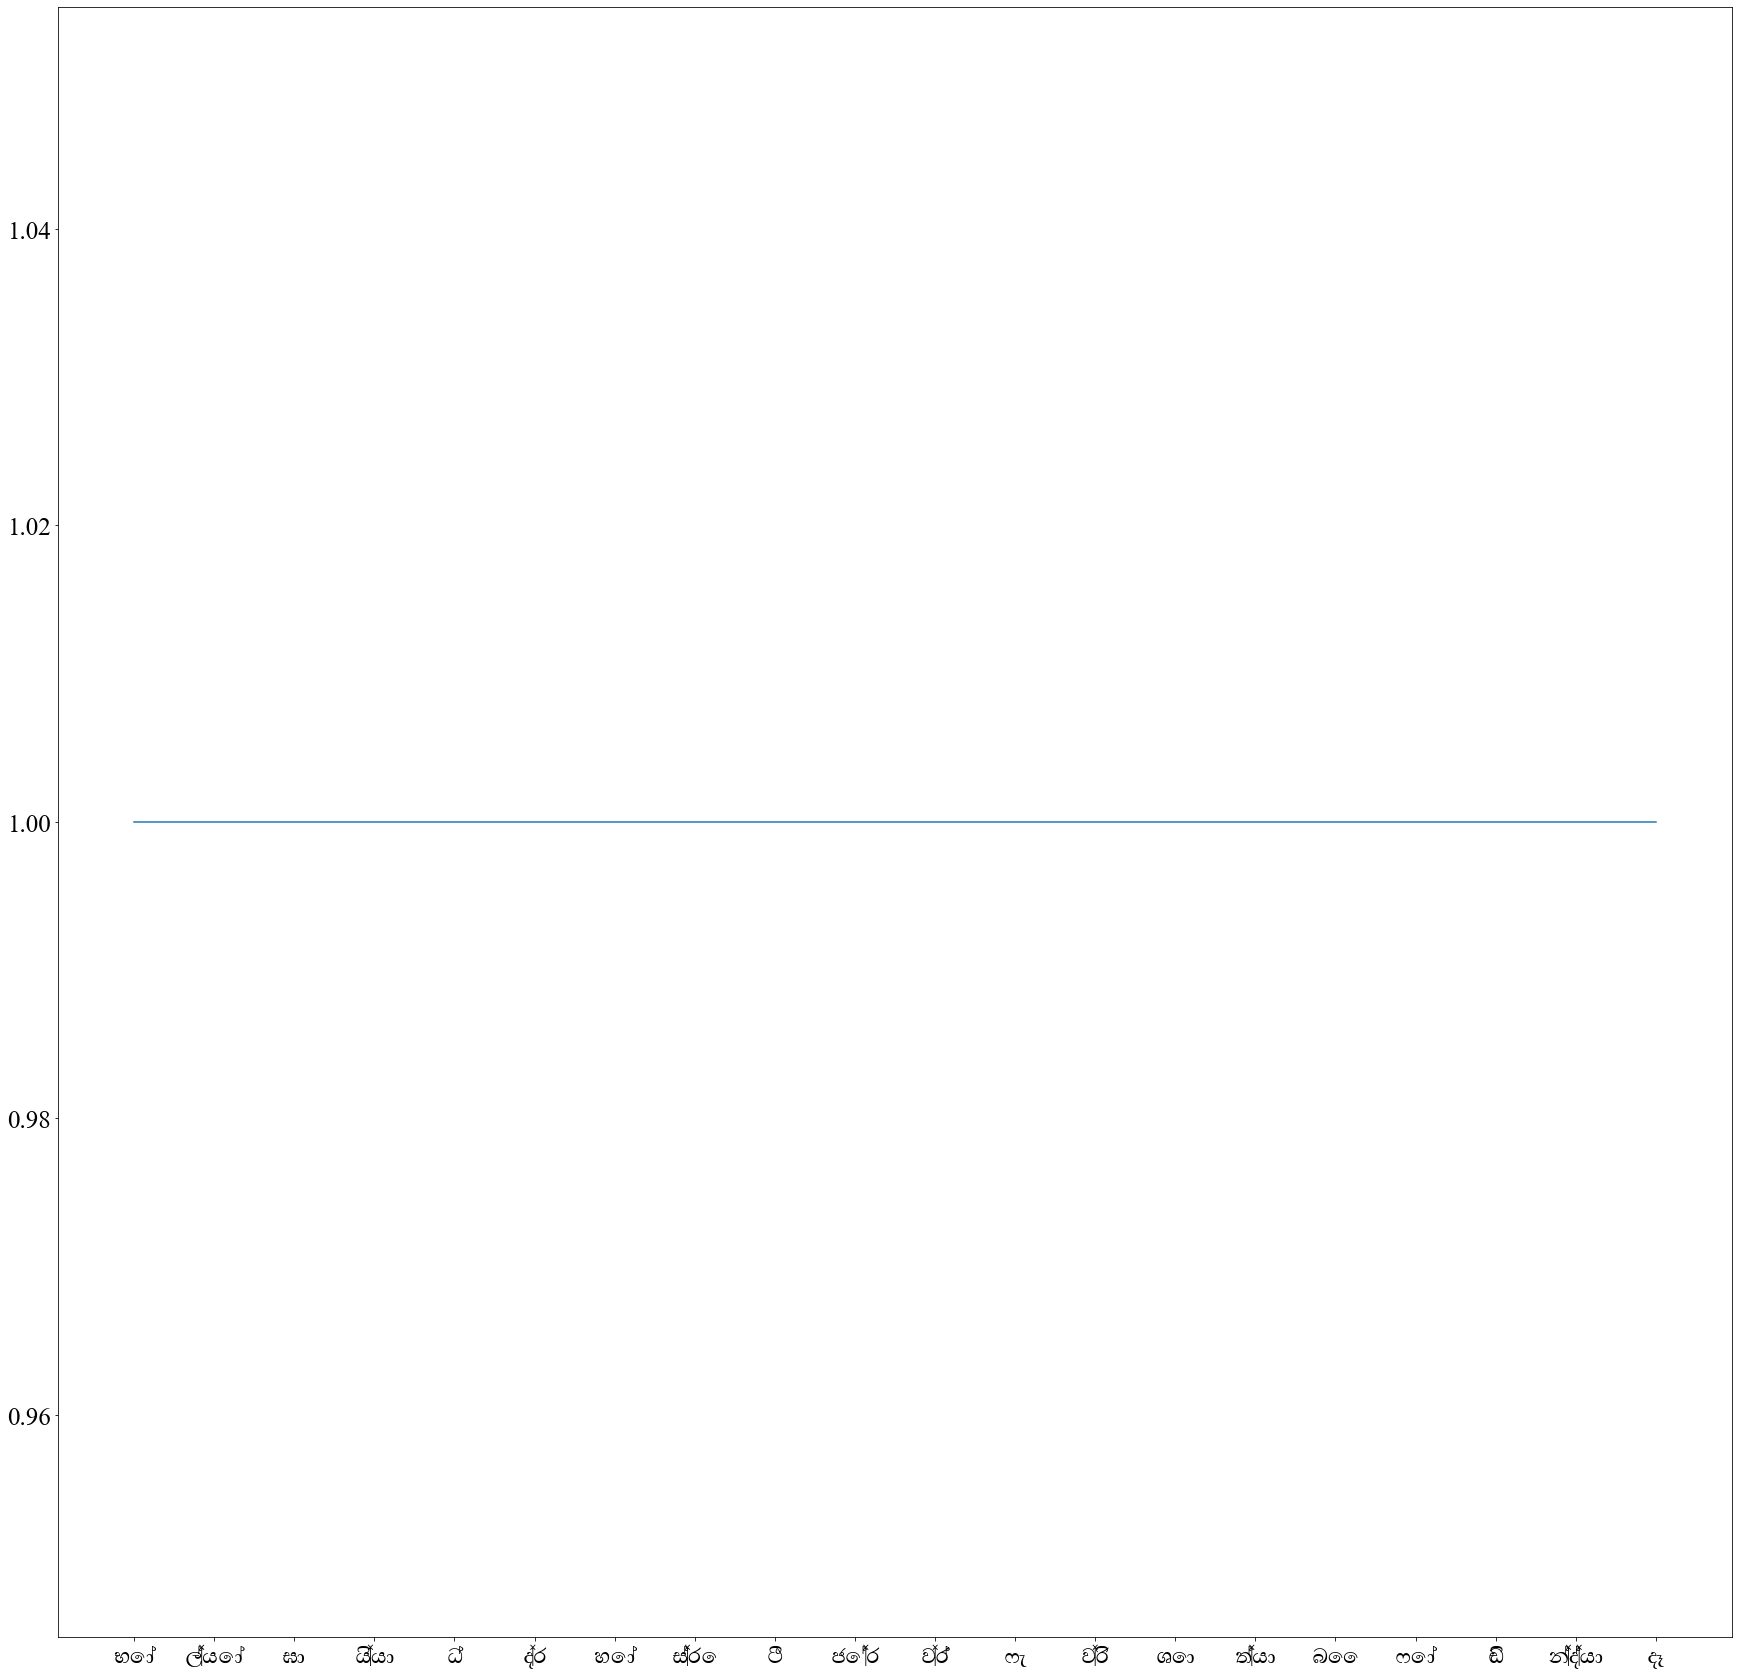

In [41]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['Iskoola Pota', 'sans-serif']
matplotlib.rcParams['font.size'] = 25
plt.figure(figsize=(30, 30))
plt.plot( characterNames[-20:], occurances[-20:])

In [ ]:
plt.pie(occurances[:20], labels=characterNames[:20])

In [43]:
independentVowels = [
    'අ',
    'ආ',
    'ඇ',
    'ඈ',
    'ඉ',
    'ඊ',
    'උ',
    'ඌ',
    'ඍ',
    'ඎ',
    'ඏ',
    'ඐ',
    'එ',
    'ඒ',
    'ඓ',
    'ඔ',
    'ඕ',
    'ඖ'
]

In [44]:
consonants = [
    'ක',
    'ඛ',
    'ග',
    'ඝ',
    'ඞ්',
    'ඟ',
    'ච',
    'ඡ',
    'ජ',
    'ඣ',
    'ඤ',
    'ඥ',
    'ඦ',
    'ට',
    'ඨ',
    'ඩ',
    'ඪ',
    'ණ',
    'ඬ',
    'ත',
    'ථ',
    'ද',
    'ධ',
    'න',
    'ඳ',
    'ප',
    'ඵ',
    'බ',
    'භ',
    'ම',
    'ඹ',
    'ය',
    'ර',
    'ල',
    'ව',
    'ශ',
    'ෂ',
    'ස',
    'හ',
    'ළ',
    'ෆ'
]

In [53]:
sign = [
    '්'
]

In [54]:
dependentVowelSigns = [
    'ා',
    'ැ',
    'ෑ',
    'ි',
    'ී',
    'ු',
    'ූ',
    'ෘ',
    'ෙ',
    'ේ',
    'ෛ'
]

In [55]:
twoPartDependentVowelSigns = [
    'ො',
    'ෝ',
    'ෞ'
]

In [56]:
dependentVowelSign = [
    'ෟ'
]

In [57]:
addidtionalDependentVowelSigns = [
    'ෲ',
    'ෳ'
]

In [58]:
variousSigns = [
    'ං',
    'ඃ'
]

In [68]:
allCharactersPopulated = independentVowels + consonants
for consonant in consonants:
    for suffix in (sign + dependentVowelSigns + twoPartDependentVowelSigns + dependentVowelSign + addidtionalDependentVowelSigns):
        allCharactersPopulated.append(f'{consonant}{suffix}')
    for suffix in (dependentVowelSigns[:-1] + twoPartDependentVowelSigns):
        allCharactersPopulated.append(f'{consonant}{sign[0]}\u200dය{suffix}')
        allCharactersPopulated.append(f'{consonant}{sign[0]}\u200dර{suffix}')

In [69]:
with open('test.txt', 'w', encoding='utf-8') as f:
    f.write('\n'.join(allCharactersPopulated))

In [70]:
set(allCharacters) - set(allCharactersPopulated)

{'ං',
 'ං\u200dජ',
 'ක්\u200dකී',
 'ක්\u200dය',
 'ක්\u200dර',
 'ක්\u200dෂ',
 'ක්\u200dෂ්',
 'ක්\u200dෂා',
 'ක්\u200dෂි',
 'ක\u200dර',
 'ග්\u200dය',
 'ග්\u200dර',
 'ජේ\u200dර',
 'ට්\u200dර',
 'ණ්\u200dය',
 'ත්\u200dති',
 'ත්\u200dය',
 'ත්\u200dර',
 'ද්\u200dය',
 'ද්\u200dර',
 'ද්\u200d\u200d',
 'දි\u200dය',
 'ද\u200dර',
 'න්\u200dද්\u200dයා',
 'ප්\u200dර',
 'බ්\u200dර',
 'බේ\u200dර',
 'ම්\u200dය',
 'මා\u200dර',
 'ම\u200dර',
 'යි\u200dයා',
 'ල්\u200dය',
 'ව්\u200dය',
 'ව\u200dර්',
 'ව\u200dරි',
 'ශ්\u200dය',
 'ශ්\u200dර',
 'ස්\u200dර',
 'සීි',
 'ෆ්\u200dර',
 'ෆ්\u200dර්',
 '\u200d'}

In [24]:
##Test
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["chrome browser to open."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)

Top terms per cluster:
Cluster 0:
 google
 ninja
 climbing
 app
 feedback
 impressed
 incredible
 translate
 map
 cat
Cluster 1:
 best
 ve
 photo
 taken
 belly
 merley
 kitten
 squooshy
 restaurant
 came


Prediction
[0]
[0]


In [34]:
import numpy as np
from sklearn.cluster import AffinityPropagation
import nltk
    
words = cleanedNames[600:900]
words = np.asarray(words) #So that indexing with a list will work
lev_similarity = -1*np.array([[nltk.edit_distance(w1,w2) for w1 in words] for w2 in words])

affprop = AffinityPropagation(affinity="precomputed", damping=0.5)
affprop.fit(lev_similarity)
for cluster_id in np.unique(affprop.labels_):
    exemplar = words[affprop.cluster_centers_indices_[cluster_id]]
    cluster = np.unique(words[np.nonzero(affprop.labels_==cluster_id)])
    cluster_str = ", ".join(cluster)
    print(" - *%s:* %s" % (exemplar, cluster_str))


 - *අඩෙයිකලම්:* අඩෙක්කලම්, අඩෙයිකන්, අඩෙයිකලම්, අඩෙයික්කන්, අඩෙයික්කලම්, අධයිකලම්, අනගොල්ලේ
 - *අතපත්තු:* අතපත්තු, අතපත්තුගම, අතපත්තුගේ, අදිපත්තු, අධිපත්තු
 - *අත්තනගොඩ:* අත්තනගොඩ, අත්තනගොල්ල, අත්තනදගෙදර, අත්තනපොල, අත්තනාගොඩ, අත්තිලිගොඩ
 - *අත්තන්:* අතදුන්, අත්ත, අත්තටු, අත්තදස්සි, අත්තන, අත්තනක්, අත්තනත්, අත්තන්, අත්තන්හරි, අත්තනායක, අත්තරගම, අත්තාර්, අත්තාස්, අත්වැල්, අත්විද, අතීබ්ඩීන්, අද්නාන්
 - *අත්තලාගේ:* අතපත්තුලාගේ, අතරගල්ලේ, අත්තටගේ, අත්තනලාගේ, අත්තන්ගේ, අත්තනායකගේ, අත්තනායකලාගේ, අත්තරගමගේ, අත්තරාලලාගේ, අත්තලලාගේ, අත්තලාගේ, අත්තුඩාවේ, අත්තොටගේ, අත්ලෑහේ, අතුබොදේ, අද්දලාගේ, අන්තක්කාරේ
 - *අත්තිඩිය:* අත්තලපිටිය, අත්තිඩි, අත්තිඩිය, අත්තිඩියේ, අත්තුඩාව, අනත්තාසියා
 - *අතාඋද:* අතවුද, අතාඋඩ, අතාඋද, අතාඋදා, අතාවුද, අතාවූද, අනන්ද, අන්තාසු
 - *අතාඋදච්චි:* අත්ථදස්සි, අතාඋදච්චි, අතාච්චි, අතාවුදඅච්චි
 - *අතිෆ්:* අතරේ, අතලිෆ්, අතලේ, අතාරිත්, අතිදේව, අතිෆ්, අතිෆා, අතීෆ්, අදිස්ට, අධිෂා
 - *අතීක්:* අතීක්, අතීකා, අතීකුර්, අතීත්, අතීබා, අතීල්, අතීසන්, අතීස්
 - *අ

D:\Anaconda3\envs\pytorchEnv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:154: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning


In [5]:
import re
from nltk.util import ngrams

In [6]:
tokens = cleanedNames[0]
output = ngrams(tokens, 2)

In [7]:
print(output.__next__())

('ෆ', 'ය')


In [6]:
def generate_ngrams(s, n):
    
    # Break sentence in the token, remove empty tokens
    tokens = s
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = zip(*[s[i:] for i in range(n)])
    return ["".join(ngram) for ngram in ngrams]

In [7]:
generate_ngrams(['ශේ', 'ෂා', 'ද්\u200dරී'], 2)

['ශේෂා', 'ෂාද්\u200dරී']

In [8]:
unigrams = []
bigrams = []
trigrams = []

tokenized_unigrams = []
tokenized_bigrams = []
tokenized_trigrams = []

for name in cleanedNames:
    unigrams += generate_ngrams(name, 1)
    bigrams += generate_ngrams(name, 2)
    trigrams += generate_ngrams(name, 3)

    name = tokenize(name)
    tokenized_unigrams += generate_ngrams(name, 1)
    tokenized_bigrams += generate_ngrams(name, 2)
    tokenized_trigrams += generate_ngrams(name, 3)

In [11]:
len(bigrams)

439052

In [9]:
from collections import Counter
unigram_counts = Counter(unigrams)
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

tokenized_unigram_counts = Counter(tokenized_unigrams)
tokenized_bigram_counts = Counter(tokenized_bigrams)
tokenized_trigram_counts = Counter(tokenized_trigrams)

sorted_unigram_counts = {k: v for k, v in sorted(unigram_counts.items(), key=lambda item: item[1], reverse=True)}
sorted_bigram_counts = {k: v for k, v in sorted(bigram_counts.items(), key=lambda item: item[1], reverse=True)}
sorted_trigram_counts = {k: v for k, v in sorted(trigram_counts.items(), key=lambda item: item[1], reverse=True)}

tokenized_sorted_unigram_counts = {k: v for k, v in sorted(tokenized_unigram_counts.items(), key=lambda item: item[1], reverse=True)}
tokenized_sorted_bigram_counts = {k: v for k, v in sorted(tokenized_bigram_counts.items(), key=lambda item: item[1], reverse=True)}
tokenized_sorted_trigram_counts = {k: v for k, v in sorted(tokenized_trigram_counts.items(), key=lambda item: item[1], reverse=True)}


In [17]:
sorted_trigram_counts

{'ගේ': 8778,
 '්\u200dර': 3542,
 'ෝ': 3026,
 'න්ද': 3023,
 'ාගෙ': 2397,
 'ාන්': 2247,
 'න්ත': 2160,
 'ල්ල': 1998,
 'ලාග': 1924,
 'ත්ත': 1782,
 'ින්': 1670,
 'රන්': 1543,
 'ිගෙ': 1403,
 '්ති': 1401,
 'ගො': 1308,
 'ිකා': 1238,
 'කො': 1210,
 'න්න': 1189,
 '\u200dරි': 1162,
 'ියා': 1158,
 'ප්\u200d': 1150,
 'ොඩ': 1112,
 'ේව': 1103,
 'රිය': 1092,
 'ිරි': 1063,
 '්ගෙ': 1062,
 'ේන': 1045,
 'ිල්': 1015,
 'ීන්': 956,
 'ලගෙ': 937,
 'ුල්': 922,
 'ද්\u200d': 911,
 'හේ': 900,
 'රාජ': 866,
 'සන්': 837,
 '්ද්': 826,
 'වේ': 814,
 'ිනි': 813,
 'ලේ': 795,
 'සිං': 791,
 'වත්': 765,
 'ානි': 762,
 'ුන්': 755,
 'ිස්': 752,
 'දේ': 752,
 'ුමා': 748,
 'නේ': 746,
 'ප්ප': 740,
 'නන්': 728,
 'ච්ච': 727,
 'සේ': 725,
 'න්ග': 707,
 'මාර': 703,
 'රත්': 695,
 '්දි': 691,
 'ිත්': 689,
 'ම්ම': 682,
 '්ලෙ': 681,
 'කුම': 665,
 'රො': 664,
 '්න්': 664,
 'ෙයි': 653,
 'ුරු': 645,
 'ාල්': 642,
 'ෙල්': 641,
 'ාර්': 630,
 'ක්ක': 629,
 'පො': 609,
 'රේ': 607,
 '්වර': 604,
 '්ලා': 598,
 'තිර': 596,
 'ගම්': 595,
 'ත

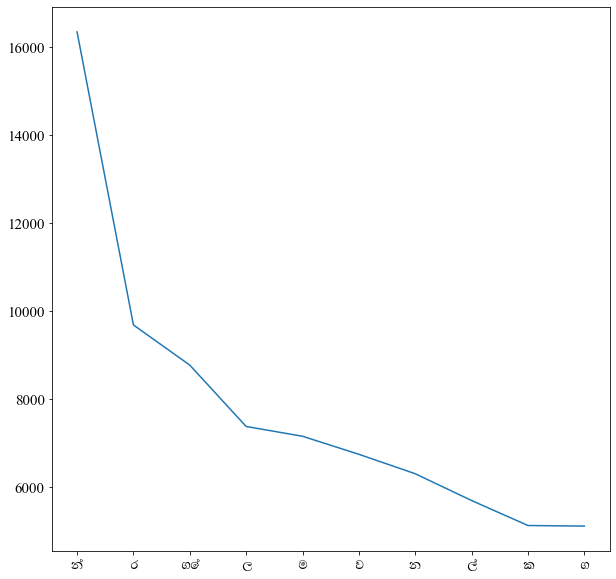

In [11]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['Iskoola Pota']
matplotlib.rcParams['font.size'] = 15
plt.figure(figsize=(10, 10))
plt.plot( list(tokenized_sorted_unigram_counts.keys())[:10], list(tokenized_sorted_unigram_counts.values())[:10])

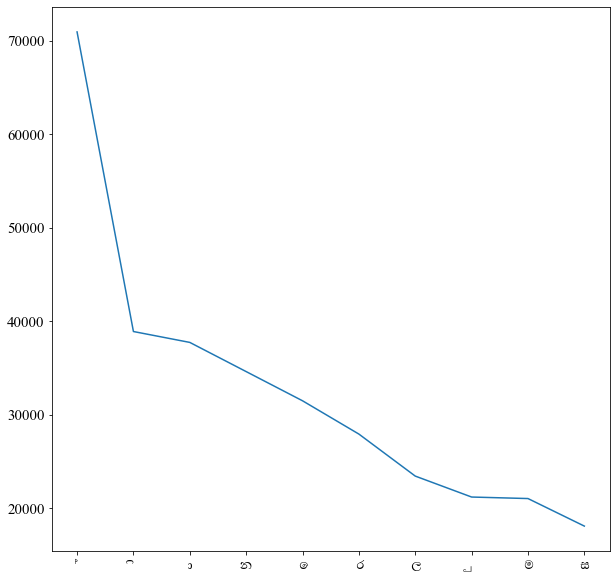

In [12]:
plt.figure(figsize=(10, 10))
plt.plot( list(sorted_unigram_counts.keys())[:10], list(sorted_unigram_counts.values())[:10])

In [19]:
name_counts = Counter(cleanedNames)

In [21]:
{k: v for k, v in sorted(name_counts.items(), key=lambda item: item[1], reverse=True)}

{'මුදියන්සේලාගේ': 17819,
 'ආරච්චිගේ': 9531,
 'ගෙදර': 8290,
 'කුමාර': 7608,
 'මොහමඩ්': 6239,
 'පෙරේරා': 4444,
 'රත්නායක': 4403,
 'දොන්': 4226,
 'ප්\u200dරනාන්දු': 4169,
 'දිසානායක': 4105,
 'ගමගේ': 4038,
 'කුමාරි': 4036,
 'හේරත්': 3835,
 'ආරච්චිලාගේ': 3499,
 'සිල්වා': 3086,
 'ලියනගේ': 2449,
 'ෆාතිමා': 2196,
 'දෝන': 2167,
 'මුහම්මදු': 2141,
 'බණ්ඩාර': 2134,
 'මොහොමඩ්': 2027,
 'අබ්දුල්': 1886,
 'හේවා': 1878,
 'රණසිංහ': 1730,
 'පේඩිගේ': 1673,
 'වීරසිංහ': 1659,
 'ජයසිංහ': 1636,
 'සම්පත්': 1587,
 'රාජපක්ෂ': 1583,
 'දේවගේ': 1402,
 'කංකානම්ගේ': 1373,
 'ප්\u200dරදීප්': 1293,
 'විතානගේ': 1252,
 'විජේසිංහ': 1239,
 'ඒකනායක': 1230,
 'වික්\u200dරමසිංහ': 1216,
 'ප්\u200dරියදර්ශනී': 1124,
 'වර්ණකුලසූරිය': 1114,
 'හෙට්ටි': 1075,
 'චමින්ද': 1063,
 'කරුණාරත්න': 1054,
 'සෙව්වන්දි': 1051,
 'සංජීව': 1042,
 'දමයන්ති': 1039,
 'ජයවර්ධන': 988,
 'සමන්': 977,
 'සරත්': 967,
 'පතිරණගේ': 951,
 'බංඩාර': 941,
 'හේවගේ': 930,
 'විජේරත්න': 920,
 'සඳරුවන්': 909,
 'රාජපක්\u200dෂ': 903,
 'අප්පුහාමිල

In [3]:
list('ේ')

['ෙ', '්']